In [2]:
from __init__ import Load, Clean

In [3]:
loader = Load('Dataset/training_set.csv')

In [4]:
loader.data()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,
1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,Generic,1
175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,...,1,2,0,0,0,1,1,0,Shellcode,1
175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,Generic,1


In [5]:
loader.features()

----------------Features in the Dataset---------------- 

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')


In [6]:
loader.stats()

----------------Summary Statistics of the Features---------------- 

                 dur          spkts          dpkts        sbytes  \
count  175341.000000  175341.000000  175341.000000  1.753410e+05   
mean        1.359389      20.298664      18.969591  8.844844e+03   
std         6.480249     136.887597     110.258271  1.747656e+05   
min         0.000000       1.000000       0.000000  2.800000e+01   
25%         0.000008       2.000000       0.000000  1.140000e+02   
50%         0.001582       2.000000       2.000000  4.300000e+02   
75%         0.668069      12.000000      10.000000  1.418000e+03   
max        59.999989    9616.000000   10974.000000  1.296523e+07   

             dbytes          rate           sttl           dttl         sload  \
count  1.753410e+05  1.753410e+05  175341.000000  175341.000000  1.753410e+05   
mean   1.492892e+04  9.540619e+04     179.546997      79.609567  7.345403e+07   
std    1.436542e+05  1.654010e+05     102.940011     110.506863  1.883574e+

In [7]:
loader.info()

----------------Dataset Overall Information---------------- 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175341 entries, 1 to 175341
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  object 
 2   service            175341 non-null  object 
 3   state              175341 non-null  object 
 4   spkts              175341 non-null  int64  
 5   dpkts              175341 non-null  int64  
 6   sbytes             175341 non-null  int64  
 7   dbytes             175341 non-null  int64  
 8   rate               175341 non-null  float64
 9   sttl               175341 non-null  int64  
 10  dttl               175341 non-null  int64  
 11  sload              175341 non-null  float64
 12  dload              175341 non-null  float64
 13  sloss              175341 non-null  int64  
 14  dloss              175341 non-null  in

In [8]:
cleaner = Clean(loader)

In [9]:
cleaner.duplicates()

The dataset has 67601 duplicated rows, which are 38.55% of the total data.

 Removing duplicates...

  Duplicates dropped.


In [10]:
cleaner.duplicates()

The dataset has no duplicated rows.


In [11]:
loader.info()

----------------Dataset Overall Information---------------- 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107740 entries, 1 to 175338
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                107740 non-null  float64
 1   proto              107740 non-null  object 
 2   service            107740 non-null  object 
 3   state              107740 non-null  object 
 4   spkts              107740 non-null  int64  
 5   dpkts              107740 non-null  int64  
 6   sbytes             107740 non-null  int64  
 7   dbytes             107740 non-null  int64  
 8   rate               107740 non-null  float64
 9   sttl               107740 non-null  int64  
 10  dttl               107740 non-null  int64  
 11  sload              107740 non-null  float64
 12  dload              107740 non-null  float64
 13  sloss              107740 non-null  int64  
 14  dloss              107740 non-null  in

In [12]:
cleaner.check_extraneous()

Column: dur, 
  Unique Values: 
 0.000009    4276
0.000003    2408
0.000008    2243
0.000010    1662
0.000005    1639
            ... 
0.694603       1
1.854685       1
1.315859       1
1.131023       1
1.208004       1
Name: dur, Length: 74039, dtype: int64 

Column: proto, 
  Unique Values: 
 tcp     76293
udp     23027
unas     2582
ospf      775
arp       633
        ...  
tlsp       26
ggp        24
igmp       17
icmp       13
rtp         1
Name: proto, Length: 133, dtype: int64 

Column: service, 
  Unique Values: 
 -           64951
http        18135
dns         11046
smtp         5025
ftp-data     3282
ftp          2691
ssh          1295
pop3         1104
snmp           63
ssl            56
dhcp           55
irc            25
radius         12
Name: service, dtype: int64 

Column: state, 
  Unique Values: 
 FIN    74478
INT    19726
CON    12487
REQ      953
RST       83
ECO       10
PAR        1
URN        1
no         1
Name: state, dtype: int64 

Column: spkts, 
  Unique Val

In [13]:
cleaner.replace_extraneous()

Extraneous value found in column service: -

 Cleaning service column... 


 Replaced 64951 occurrences of '-' in column 'service' with 'no-service'. 



c:\Users\DELL\Documents\Moringa\Phase5\CyberThreat_detection_project\AI-Powered-CyberThreat-Detection\__init__.py:55: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if placeholder in self.df[col].values:


The 'is_ftp_login' column is a binary column but has more than two unique values. We'll drop these extras

In [14]:
cleaner.binary_check()

Extra values found in 'is_ftp_login': [0 1 2 4] 


 Cleaning is_ftp_login column... 


 is_ftp_login column cleaned.

 Column 'is_sm_ips_ports' has only binary values.


In [15]:
cleaner.binary_check()


 Column 'is_ftp_login' has only binary values.

 Column 'is_sm_ips_ports' has only binary values.


In [16]:
df1 = cleaner.df

In [17]:
test_loader = Load('Dataset/testing_set.csv')

In [18]:
test_loader.data()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,
1,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,...,1,2,0,0,0,1,2,0,Normal,0
3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,...,1,3,0,0,0,1,3,0,Normal,0
4,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,...,1,3,0,0,0,2,3,0,Normal,0
5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,...,1,2,0,0,0,2,1,0,Normal,0
82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,...,1,1,0,0,0,3,2,0,Normal,0
82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0


In [19]:
test_loader.features()

----------------Features in the Dataset---------------- 

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')


In [20]:
test_loader.stats()

----------------Summary Statistics of the Features---------------- 

                dur         spkts         dpkts        sbytes        dbytes  \
count  82332.000000  82332.000000  82332.000000  8.233200e+04  8.233200e+04   
mean       1.006756     18.666472     17.545936  7.993908e+03  1.323379e+04   
std        4.710444    133.916353    115.574086  1.716423e+05  1.514715e+05   
min        0.000000      1.000000      0.000000  2.400000e+01  0.000000e+00   
25%        0.000008      2.000000      0.000000  1.140000e+02  0.000000e+00   
50%        0.014138      6.000000      2.000000  5.340000e+02  1.780000e+02   
75%        0.719360     12.000000     10.000000  1.280000e+03  9.560000e+02   
max       59.999989  10646.000000  11018.000000  1.435577e+07  1.465753e+07   

               rate          sttl          dttl         sload         dload  \
count  8.233200e+04  82332.000000  82332.000000  8.233200e+04  8.233200e+04   
mean   8.241089e+04    180.967667     95.713003  6.454902e+07

In [21]:
test_loader.info()

----------------Dataset Overall Information---------------- 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82332 entries, 1 to 82332
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   proto              82332 non-null  object 
 2   service            82332 non-null  object 
 3   state              82332 non-null  object 
 4   spkts              82332 non-null  int64  
 5   dpkts              82332 non-null  int64  
 6   sbytes             82332 non-null  int64  
 7   dbytes             82332 non-null  int64  
 8   rate               82332 non-null  float64
 9   sttl               82332 non-null  int64  
 10  dttl               82332 non-null  int64  
 11  sload              82332 non-null  float64
 12  dload              82332 non-null  float64
 13  sloss              82332 non-null  int64  
 14  dloss              82332 non-null  int64  
 15  sinpkt  

In [22]:
test_cleaner = Clean(test_loader)

In [23]:
test_cleaner.duplicates()

The dataset has 26387 duplicated rows, which are 32.05% of the total data.

 Removing duplicates...

  Duplicates dropped.


In [24]:
test_cleaner.duplicates()

The dataset has no duplicated rows.


In [25]:
test_loader.info()

----------------Dataset Overall Information---------------- 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55945 entries, 1 to 82329
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                55945 non-null  float64
 1   proto              55945 non-null  object 
 2   service            55945 non-null  object 
 3   state              55945 non-null  object 
 4   spkts              55945 non-null  int64  
 5   dpkts              55945 non-null  int64  
 6   sbytes             55945 non-null  int64  
 7   dbytes             55945 non-null  int64  
 8   rate               55945 non-null  float64
 9   sttl               55945 non-null  int64  
 10  dttl               55945 non-null  int64  
 11  sload              55945 non-null  float64
 12  dload              55945 non-null  float64
 13  sloss              55945 non-null  int64  
 14  dloss              55945 non-null  int64  
 15  sinpkt  

In [26]:
test_cleaner.check_extraneous()

Column: dur, 
  Unique Values: 
 0.000009    1561
0.000003    1284
0.000008    1255
0.000010    1092
0.000004    1062
            ... 
1.190329       1
0.845760       1
0.004365       1
1.534591       1
0.484756       1
Name: dur, Length: 39888, dtype: int64 

Column: proto, 
  Unique Values: 
 tcp          40559
udp          12541
unas           885
arp            298
ospf           190
             ...  
crudp           10
a/n             10
dgp             10
ipv6-frag       10
ib               9
Name: proto, Length: 131, dtype: int64 

Column: service, 
  Unique Values: 
 -           37027
http         7930
dns          6091
smtp         1759
ftp          1291
ftp-data     1177
pop3          381
ssh           204
ssl            30
snmp           25
dhcp           19
radius          6
irc             5
Name: service, dtype: int64 

Column: state, 
  Unique Values: 
 FIN    37355
INT    10646
CON     6711
REQ     1227
ACC        4
CLO        1
RST        1
Name: state, dtype: int64 


In [27]:
test_cleaner.replace_extraneous()

Extraneous value found in column service: -

 Cleaning service column... 


 Replaced 37027 occurrences of '-' in column 'service' with 'no-service'. 



c:\Users\DELL\Documents\Moringa\Phase5\CyberThreat_detection_project\AI-Powered-CyberThreat-Detection\__init__.py:55: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if placeholder in self.df[col].values:


The 'is_ftp_login' column is a binary column but has more than two unique values. We'll drop these extras

In [28]:
test_cleaner.binary_check()

Extra values found in 'is_ftp_login': [0 1 2] 


 Cleaning is_ftp_login column... 


 is_ftp_login column cleaned.

 Column 'is_sm_ips_ports' has only binary values.


In [29]:
test_cleaner.binary_check()


 Column 'is_ftp_login' has only binary values.

 Column 'is_sm_ips_ports' has only binary values.


In [30]:
test_df = test_cleaner.df

In [31]:
test_df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,
1,0.000011,udp,no-service,INT,2,0,496,0,90909.090200,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000008,udp,no-service,INT,2,0,1762,0,125000.000300,254,...,1,2,0,0,0,1,2,0,Normal,0
3,0.000005,udp,no-service,INT,2,0,1068,0,200000.005100,254,...,1,3,0,0,0,1,3,0,Normal,0
4,0.000006,udp,no-service,INT,2,0,900,0,166666.660800,254,...,1,3,0,0,0,2,3,0,Normal,0
5,0.000010,udp,no-service,INT,2,0,2126,0,100000.002500,254,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82320,0.811914,tcp,no-service,FIN,10,6,588,268,18.474862,254,...,1,4,0,0,0,1,4,0,Normal,0
82323,0.000004,udp,no-service,INT,2,0,104,0,250000.000600,254,...,1,1,0,0,0,1,1,0,Normal,0
82324,5.167410,tcp,no-service,FIN,108,24,138067,1042,25.351192,254,...,1,1,0,0,0,1,3,0,Normal,0


In [32]:
## Exploratory Data Analysis

#### Univariate Analysis 

In [33]:
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns 

In [34]:
# # Convert attack_cat to string type 
# df1['attack_cat'] = df1['attack_cat'].astype(str)

# # Get attack category counts
# attack_counts = df1['attack_cat'].value_counts().reset_index()
# attack_counts.columns = ['attack_cat', 'count']  # Rename for clarity

# # Bar plot
# fig = px.bar(
#     attack_counts,
#     x='attack_cat',
#     y='count',
#     labels={'attack_cat': 'Attack Category', 'count': 'Count'},
#     title='Distribution of Attack Categories',
#     color='attack_cat'
# )
# fig.show()

From the bar plot showing the distribution of attack categories, we can observe that the most frequent category is *Normal, indicating no attack activity. This is followed by **Exploits, **Fuzzers, and **Reconnaissance, while the **Worm* attack category has the lowest count.

In [35]:
# # List of main numerical features (feel free to adjust based on importance)
# main_features = [
#     'dur', 'sbytes', 'dbytes','sload', 'dload','spkts', 'dpkts','smean', 'dmean',
# 'rate'
# ]

# # Plotting settings
# sns.set(style='whitegrid')
# plt.figure(figsize=(20, 15))

# # Loop through each feature and plot
# for i, feature in enumerate(main_features):
#     plt.subplot(4, 3, i + 1)
#     sns.histplot(df1[feature], kde=True, bins=50, color='skyblue')
#     plt.title(f'Distribution of {feature}')
#     plt.xlabel(feature)
#     plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()


The distributions of the selected numerical features are all highly *right-skewed*, with the majority of values concentrated near zero and a long tail extending toward higher values. This indicates that:

* *Most network traffic instances involve low durations, small packet sizes, and low data transfer rates.*
* *Only a small number of observations exhibit unusually high values*, possibly indicating outliers or abnormal behaviors such as attacks or large data transfers.
* Features like smean and rate show *multi-modal characteristics*, suggesting the presence of distinct traffic patterns or clusters within the data.

## Bivariate Analysis 

#### Numerical Features 

In [36]:
# # List of important features to compare with label
# main_features = [
#     'sbytes', 'dbytes', 'rate',
    
# ]

# # Plot each feature against the binary target 'label'
# for feature in main_features:
#     fig = px.box(df1, x='label', y=feature, color='label',
#                  title=f'{feature} vs Label (Bivariate Box Plot)',
#                  labels={'label': 'Is Malicious (0=No, 1=Yes)', feature: feature})
#     fig.show()

1. Rate vs Label:
Malicious traffic (label = 1) exhibits a noticeably higher and more variable rate compared to normal traffic (label = 0). The  extreme outliers suggest that malicious activities often involve rapid data transfers. This makes rate a potentially strong indicator of threats .

1. Dbytes vs Label:
Malicious flows have significantly higher destination byte counts with many outliers above 14 million. Normal traffic remains relatively low and less spread. This pattern implies dbytes could be a strong indicator of attacks involving large data transfers.

1. Sbytes vs Label:
Malicious traffic has much higher sbytes values, often exceeding 12 million, while normal flows are lower and tightly distributed. The wide spread and outliers suggest large source transfers are common in attacks. Therefore, sbytes may help in detecting abnormal activity effectively.

The visualizations below display the top ten categories for each feature, showing the counts of normal and malicious instances within each category.

In [37]:
# import plotly.express as px

# # Map binary labels to descriptive names
# df1['label_named'] = df1['label'].map({0: 'Normal', 1: 'Malicious'})

# # Filter to top 10 protocols by count
# top_protocols = df1['proto'].value_counts().nlargest(10).index
# df_proto = df1[df1['proto'].isin(top_protocols)]

# # Protocol vs Binary Label (Top 10 Only)
# fig = px.histogram(df_proto, x='proto', color='label_named', barmode='group',
#                    title='Top 10 Protocols vs Binary Label',
#                    labels={'label_named': 'Traffic Type'})
# fig.show()

Protocal vs Binary label

The most frequent protocol, TCP, shows that a large portion of its traffic is associated with malicious behavior. In contrast, UDP has a higher count of normal (non-malicious) traffic, indicating that it is not heavily targeted by attacks.

In [38]:
# # Service vs Binary Label
# fig = px.histogram(df1, x='service', color='label_named', barmode='group',
#                    title='Service vs Binary Label',
#                    labels={'label_named': 'Traffic Type'})
# fig.show()

Service vs Binary label
The "no_service" category contains both malicious and normal traffic in almost equal amounts. The HTTP service, however, shows a higher count of malicious activity, while DNS has a higher count of normal traffic compared to malicious.

In [39]:
# # State vs Binary Label
# fig = px.histogram(df1, x='state', color='label_named', barmode='group',
#                    title='State vs Binary Label',
#                    labels={'label_named': 'Traffic Type'})
# fig.show()

State vs Binary label
The FIN state appears most frequently and shows almost equal counts of both malicious and normal traffic. The INT state shows a higher number of malicious activities than normal, whereas the CON state shows the opposite normal traffic dominates over malicious.

In [40]:
# import plotly.express as px

# # Get top 5 most frequent services
# top_services = df1['service'].value_counts().nlargest(5).index

# # Filter the dataframe to only include those top 5 services
# df_service = df1[df1['service'].isin(top_services)]

# # Plot histogram
# fig = px.histogram(df_service, x='service', color='attack_cat', barmode='group',
#                    title='Top 5 Services vs Attack Category')
# fig.show()

The graph above shows the count of each attack category. It reveals that the most targeted category is 'no_service', which exhibits a range of attack counts from high to low. This is followed by 'http', although its attack counts are relatively lower.

#### Multivariate Analysis

In [41]:
# # Select only numeric columns manually
# numeric_df = df1.select_dtypes(include=['number'])

# # Compute correlation matrix
# corr_matrix = numeric_df.corr()

# # Get top 20 features most correlated with the label
# top_corr_features = corr_matrix['label'].abs().sort_values(ascending=False).head(21).index

# # Filter for top correlated features
# top_corr_df = numeric_df[top_corr_features]

# # Plot heatmap
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(14, 10))
# sns.heatmap(top_corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap of Top 20 Features with Label')
# plt.show()

The heatmap above shows the top 20 features most correlated with the label (0 = normal, 1 = malicious). Darker shades indicate stronger correlations either positive or negative while lighter shades show weaker relationships. This helps identify which features are more informative for detecting malicious activity and highlights inter-feature dependencies or redundancy.

### Modelling 

In [47]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, classification_report, confusion_matrix

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)


#Drop the label column
df1.drop(columns=['label'], inplace=True,errors='ignore')
test_df.drop(columns=['label'], inplace=True,errors='ignore')
#Label encode the attack_cat column 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['attack_cat'] = le.fit_transform(df1['attack_cat'])

test_df['attack_cat'] = le.fit_transform(test_df['attack_cat'])

c:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-47-e8b97091c33c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['attack_cat'] = le.fit_transform(df1['attack_cat'])
<ipython-input-47-e8b97091c33c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [48]:

X = df1.drop(columns=['attack_cat'])
y = df1['attack_cat']
# Now define column types from X
cat = [col for col in X.select_dtypes(include=['object']).columns]
binary = ['is_ftp_login', 'is_sm_ips_ports']
numerical = [col for col in X.select_dtypes(include=['int64', 'float64']).columns if col not in binary]

from sklearn.model_selection import train_test_split
# Define the preprocessor
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat),
    ("bin", "passthrough", binary)
])
X_processed = preprocessor.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.3, random_state=42, stratify=y)


In [49]:
# Import necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, classification_report  # changed from precision_score to recall_score

# # Define the preprocessor
# preprocessor = ColumnTransformer([
#     ("num", StandardScaler(), numerical),
#     ("cat", OneHotEncoder(handle_unknown="ignore"), cat),
#     ("bin", "passthrough", binary)
# ])

# Define the pipeline
pipeline = Pipeline([
    # ("prep", preprocessor),
    ("model", LogisticRegression(random_state=42))
])

# Fit the pipeline to training data
pipeline.fit(X_train, y_train)

# Predict on training and validation data
y_train_pred = pipeline.predict(X_train)
y_val_pred = pipeline.predict(X_val)

# Print macro recall for train and validation
print("Train Recall :", recall_score(y_train, y_train_pred, average='weighted'))
print("Validation Recall :", recall_score(y_val, y_val_pred, average='weighted'))

# Print classification report on validation set
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))


Train Recall : 0.7430480964315551
Validation Recall : 0.7410581683168317

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.16      0.14      0.15       478
           1       0.17      0.08      0.11       461
           2       0.19      0.04      0.07      1142
           3       0.73      0.80      0.76      5952
           4       0.50      0.76      0.61      4844
           5       0.95      0.80      0.87      1254
           6       0.96      0.84      0.89     15567
           7       0.45      0.57      0.50      2257
           8       0.75      0.08      0.15       327
           9       0.33      0.03      0.05        38

    accuracy                           0.74     32320
   macro avg       0.52      0.41      0.41     32320
weighted avg       0.76      0.74      0.74     32320



------------------------------------------------------------------------------------------

## XGBoost

In [50]:
# Prepare features and target
from sklearn.model_selection import train_test_split

X = df1.drop(columns=['attack_cat'])
y = df1['attack_cat']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

### Untuned XGB

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, recall_score

# # Prepare features and target
# X = df1.drop(columns=['attack_cat'])
# y = df1['attack_cat']

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Define your columns
cat = [col for col in X_train.select_dtypes(include=['object']).columns]
binary = ['is_ftp_login', 'is_sm_ips_ports']
numerical = [col for col in X_train.select_dtypes(include=['int64', 'float64']).columns if col not in binary]

# Preprocessing transformer
preprocessor_xgb = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), cat),
        ('num', StandardScaler(), numerical),
        ('bin', 'passthrough', binary)
    ]
)

# Full pipeline: preprocessing -> classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_xgb),
    ('clf', XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    ))
])

# Fit pipeline
pipeline.fit(X_train, y_train)

# Predict on training and validation sets
y_pred_train = pipeline.predict(X_train)
y_pred_val = pipeline.predict(X_val)

# Evaluation on training and validation sets
print("Validation Classification Report:")
print(classification_report(y_val, y_pred_val))
print("\nTraining Classification Report:")
print(classification_report(y_train, y_pred_train))

# Print recall scores (macro average for multiclass)
train_recall = recall_score(y_train, y_pred_train, average='weighted')
val_recall = recall_score(y_val, y_pred_val, average='weighted')
print(f"\nTraining Recall : {train_recall:.4f}")
print(f"Validation Recall : {val_recall:.4f}")

# ----------------- TEST SET EVALUATION -----------------

X_test = test_df.drop(columns=['attack_cat'])
y_test = test_df['attack_cat']

# Predict on test set
y_pred_test = pipeline.predict(X_test)

# Evaluation on test set
print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))


# Print recall scores 
train_recall = recall_score(y_train, y_pred_train, average='weighted')
val_recall = recall_score(y_val, y_pred_val, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
print(f"\nTraining Recall : {train_recall:.4f}")
print(f"Validation Recall : {val_recall:.4f}")

print(f"Test Recall : {test_recall:.4f}")


[16:44:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.23      0.15       398
           1       0.20      0.21      0.21       384
           2       0.44      0.20      0.28       951
           3       0.81      0.86      0.83      4960
           4       0.71      0.76      0.74      4037
           5       0.98      0.84      0.90      1045
           6       0.94      0.92      0.93     12972
           7       0.80      0.74      0.77      1881
           8       0.65      0.76      0.70       273
           9       0.66      0

# confusion matrix of untuned XGBoost


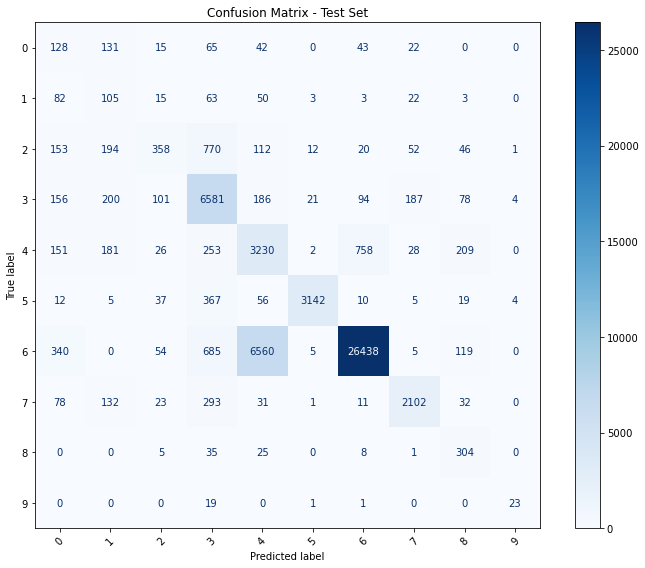

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix for test set
cm = confusion_matrix(y_test, y_pred_test)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
ax.set_title("Confusion Matrix - Test Set")
plt.tight_layout()
plt.show()

### Hyperparameter Tuning 

In [55]:
# Prepare features and target
X = df1.drop(columns=['attack_cat'])
y = df1['attack_cat']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Define your columns
cat = [col for col in X_train.select_dtypes(include=['object']).columns]
binary = ['is_ftp_login', 'is_sm_ips_ports']
numerical = [col for col in X_train.select_dtypes(include=['int64', 'float64']).columns if col not in binary]

# Preprocessing transformer
preprocessor_xgb = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), cat),
        ('num', StandardScaler(), numerical),
        ('bin', 'passthrough', binary)
    ]
)

# Pipeline with XGBClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_xgb),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Hyperparameter grid
param_grid = {
    'clf__max_depth': [4, 5],
    'clf__n_estimators': [100, 150],
    'clf__subsample': [0.8, 1.0],
    'clf__colsample_bytree': [0.8, 1.0]
}

# Grid Search CV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='recall_weighted',
    n_jobs=-1,
    verbose=1
)
# Fit grid search
grid_search.fit(X_train, y_train)

# Best pipeline
best_model = grid_search.best_estimator_

# Predict on train, val, and test sets
y_pred_train = best_model.predict(X_train)
y_pred_val = best_model.predict(X_val)

X_test = test_df.drop(columns=['attack_cat'])
y_test = test_df['attack_cat']
y_pred_test = best_model.predict(X_test)

# Classification reports
print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))

print("\nValidation Classification Report:")
print(classification_report(y_val, y_pred_val))

print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))

# Weighted recall scores
train_recall = recall_score(y_train, y_pred_train, average='weighted')
val_recall = recall_score(y_val, y_pred_val, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')

print(f"\nTraining Recall : {train_recall:.4f}")
print(f"Validation Recall : {val_recall:.4f}")
print(f"Test Recall : {test_recall:.4f}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 56.0min finished


[17:42:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Training Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.50      0.36      1196
           1       0.38      0.37      0.37      1151
           2       0.59      0.30      0.39      2855
           3       0.84      0.89      0.87     14879
           4       0.74      0.79      0.76     12110
           5       0.98      0.88      0.93      3136
           6       0.95      0.93      0.94     38917
           7       0.85      0.79      0.82      5641
           8       0.76      0.89      0.82       818
           9       0.94      1.0

In [57]:
# ...existing code...

import lime
import lime.lime_tabular
import numpy as np

# Get feature names after preprocessing
feature_names = (
    numerical +
    list(best_model.named_steps['preprocessor'].transformers_[0][1].get_feature_names(cat)) +
    binary
)

# Create LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(best_model.named_steps['preprocessor'].transform(X_train)),
    feature_names=feature_names,
    class_names=np.unique(y_train).astype(str),
    mode='classification'
)

# Pick a test instance to explain
i = 0  # index of the test sample to explain
test_instance = X_test.iloc[i:i+1]
test_instance_transformed = best_model.named_steps['preprocessor'].transform(test_instance)

# Explain prediction
exp = explainer.explain_instance(
    data_row=test_instance_transformed[0],
    predict_fn=best_model.named_steps['clf'].predict_proba
)

# Show explanation in notebook
exp.show_in_notebook(show_table=True)

# tuned cofusion matrix


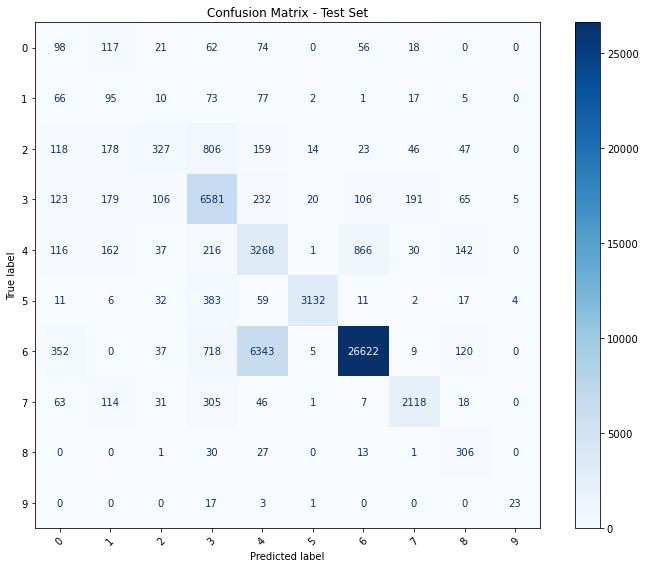

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix for test set
cm_test = confusion_matrix(y_test, y_pred_test, labels=best_model.named_steps['clf'].classes_)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=best_model.named_steps['clf'].classes_)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
ax.set_title("Confusion Matrix - Test Set")
plt.tight_layout()
plt.show()


# lime for tuned XGBoost

In [ ]:
# Save only the XGBoost model (not the whole pipeline)
# xgb_model = best_model.named_steps['clf']
# xgb_model.save_model('xgboost_model.json')

In [ ]:
# # Install LIME if not already installed
# # !pip install lime

# import lime
# import lime.lime_tabular
# import numpy as np

# # Get the preprocessed feature names
# ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
# cat_features = ohe.get_feature_names_out(cat)
# feature_names = list(cat_features) + numerical + binary

# # Transform validation data
# X_val_transformed = pipeline.named_steps['preprocessor'].transform(X_val)

# # Get the model from the pipeline
# xgb_model = pipeline.named_steps['clf']

# # Create LIME explainer
# explainer = lime.lime_tabular.LimeTabularExplainer(
#     X_val_transformed,
#     feature_names=feature_names,
#     class_names=np.unique(y_train).astype(str),
#     discretize_continuous=True,
#     mode='classification'
# )

# # Explain a single prediction (e.g., the first sample in X_val)
# i = 0
# exp = explainer.explain_instance(
#     X_val_transformed[i],
#     xgb_model.predict_proba,
#     num_features=10
# )

# # Show explanation in notebook
# exp.show_in_notebook(show_table=True)

In [ ]:
# Step 0: Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Step 1: Encode target labels
# le = LabelEncoder()
# df1['attack_cat'] = le.fit_transform(df1['attack_cat'])

# # Step 2: Clean and validate test_df
# test_df = test_df[test_df['attack_cat'].isin(le.classes_)]
# if test_df.empty:
#     raise ValueError("Error: test_df has 0 valid samples after label filtering!")

test_df['attack_cat'] = le.fit_transform(test_df['attack_cat'])

# Step 3: Split features and labels
# X = df1.drop(columns=['attack_cat'])
# y = df1['attack_cat']
X_test = test_df.drop(columns=['attack_cat'])
y_test = test_df['attack_cat']

# Step 4: Identify column types
cat = [col for col in X.select_dtypes(include=['object']).columns]
binary = ['is_ftp_login', 'is_sm_ips_ports']
numerical = [col for col in X.select_dtypes(include=['int64', 'float64']).columns if col not in binary]

# Step 5: Define preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat),
    ('bin', 'passthrough', binary)
])

# Step 6: Transform features
X_processed = preprocessor.fit_transform(X)
X_test_processed = preprocessor.transform(X_test)

# Step 7: Train/Validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

# Step 8: One-hot encode targets
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Step 9: Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=[tf.keras.metrics.Recall(name='recall')]
)

# Step 10: Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


<ipython-input-147-7d1cc7a6edc2>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['attack_cat'] = le.fit_transform(test_df['attack_cat'])


Epoch 1/50
2694/2694 [==============================] - 4s 2ms/step - loss: 0.7481 - recall: 0.6099 - val_loss: 0.6288 - val_recall: 0.6782
Epoch 2/50
2694/2694 [==============================] - 4s 1ms/step - loss: 0.6367 - recall: 0.6703 - val_loss: 0.5904 - val_recall: 0.7015
Epoch 3/50
2694/2694 [==============================] - 4s 1ms/step - loss: 0.6070 - recall: 0.6900 - val_loss: 0.5742 - val_recall: 0.7023
Epoch 4/50
2694/2694 [==============================] - 4s 1ms/step - loss: 0.5896 - recall: 0.7022 - val_loss: 0.5565 - val_recall: 0.7225
Epoch 5/50
2694/2694 [==============================] - 4s 1ms/step - loss: 0.5777 - recall: 0.7095 - val_loss: 0.5462 - val_recall: 0.7302
Epoch 6/50
2694/2694 [==============================] - 4s 1ms/step - loss: 0.5689 - recall: 0.7156 - val_loss: 0.5441 - val_recall: 0.7280
Epoch 7/50
2694/2694 [==============================] - 4s 2ms/step - loss: 0.5641 - recall: 0.7163 - val_loss: 0.5357 - val_recall: 0.7175
Epoch 8/50
2694/2694

In [ ]:
from sklearn.metrics import classification_report, recall_score

# Step 11: Predict classes
y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_val_pred = np.argmax(model.predict(X_val), axis=1)
y_test_pred = np.argmax(model.predict(X_test_processed), axis=1)

# Step 12: Decode one-hot true labels back to integers
y_train_true = np.argmax(y_train_cat, axis=1)
y_val_true = np.argmax(y_val_cat, axis=1)
y_test_true = np.argmax(y_test_cat, axis=1)

# Step 13: Print classification report on test set
print("=== Classification Report (Test Set) ===")
print(classification_report(y_test_true, y_test_pred))

# Step 14: Print recall scores using weighted average
train_recall = recall_score(y_train_true, y_train_pred, average='weighted')
val_recall = recall_score(y_val_true, y_val_pred, average='weighted')
test_recall = recall_score(y_test_true, y_test_pred, average='weighted')

print(f"Train Recall (weighted): {train_recall:.4f}")
print(f"Validation Recall (weighted): {val_recall:.4f}")
print(f"Test Recall (weighted): {test_recall:.4f}")


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.08      0.07      0.08       446
           1       0.14      0.01      0.02       346
           2       0.47      0.09      0.15      1718
           3       0.63      0.87      0.73      7608
           4       0.26      0.73      0.38      4838
           5       1.00      0.82      0.90      3657
           6       0.98      0.70      0.82     34206
           7       0.68      0.77      0.72      2703
           8       0.29      0.48      0.36       378
           9       0.80      0.09      0.16        44

    accuracy                           0.71     55944
   macro avg       0.53      0.46      0.43     55944
weighted avg       0.83      0.71      0.74     55944

Train Recall (weighted): 0.7930
Validation Recall (weighted): 0.7857
Test Recall (weighted): 0.7095


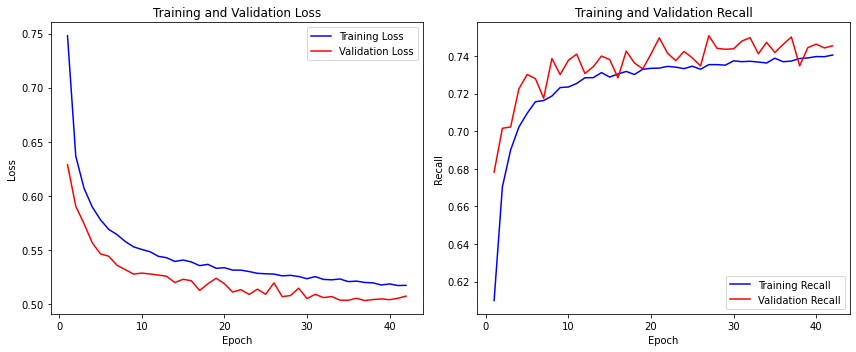

In [ ]:
import matplotlib.pyplot as plt

# Extract history
loss = history.history['loss']
val_loss = history.history['val_loss']
recall = history.history['recall']
val_recall = history.history['val_recall']

epochs = range(1, len(loss) + 1)

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Recall
plt.subplot(1, 2, 2)
plt.plot(epochs, recall, 'b', label='Training Recall')
plt.plot(epochs, val_recall, 'r', label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

plt.tight_layout()
plt.show()


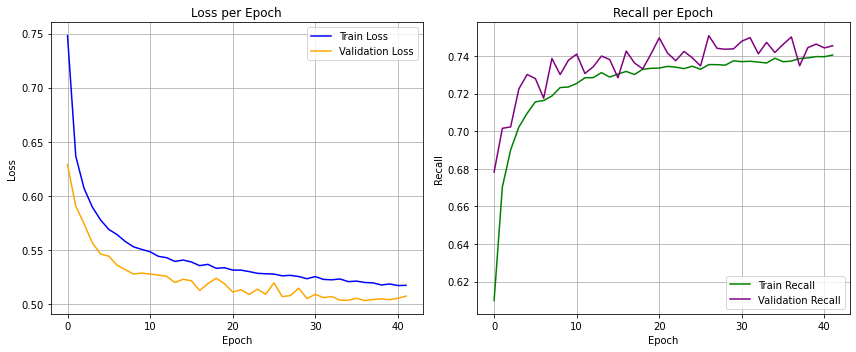

In [ ]:
import matplotlib.pyplot as plt

# Loss plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Recall plot (train, val, test)
plt.subplot(1, 2, 2)
plt.plot(history.history['recall'], label='Train Recall', color='green')
plt.plot(history.history['val_recall'], label='Validation Recall', color='purple')

plt.title('Recall per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


#### Stacked Bar Chart

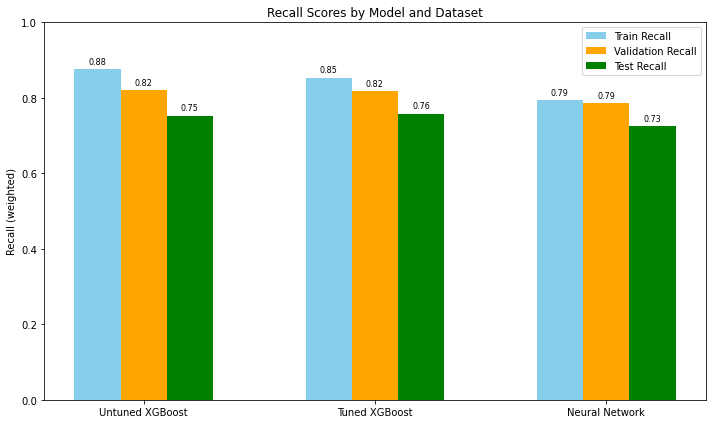

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Recall values
untuned_train_recall = 0.8755
untuned_val_recall = 0.8216
untuned_test_recall = 0.7530

tuned_train_recall = 0.8540
tuned_val_recall = 0.8190
tuned_test_recall = 0.7582

nn_train_recall = 0.7937
nn_val_recall = 0.7871
nn_test_recall = 0.7253

# Model labels
models = ['Untuned XGBoost', 'Tuned XGBoost', 'Neural Network']

# Recall values grouped by type
train_recalls = [untuned_train_recall, tuned_train_recall, nn_train_recall]
val_recalls = [untuned_val_recall, tuned_val_recall, nn_val_recall]
test_recalls = [untuned_test_recall, tuned_test_recall, nn_test_recall]

# Bar positioning
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, train_recalls, width, label='Train Recall', color='skyblue')
bars2 = ax.bar(x, val_recalls, width, label='Validation Recall', color='orange')
bars3 = ax.bar(x + width, test_recalls, width, label='Test Recall', color='green')

# Labels and formatting
ax.set_ylabel('Recall (weighted)')
ax.set_title('Recall Scores by Model and Dataset')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1)
ax.legend()

# Annotate each bar with value
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()
